<a href="https://colab.research.google.com/github/AbhiPatil195/Market_segmentation_case_study/blob/main/Copy_of_fast_food_case_study_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Food Case Study - Clean Python Version

Saving ausvacation.csv to ausvacation.csv
First 5 rows:
   info.brochures.destination  info.brochures.hotel  \
0                           1                     0   
1                           1                     1   
2                           1                     1   
3                           1                     0   
4                           1                     1   

   info.brochures.tour.operator  info.travel.agent  info.tourist.centre  \
0                             0                  1                    1   
1                             1                  0                    1   
2                             1                  1                    1   
3                             1                  1                    0   
4                             1                  1                    0   

   info.advertising.newspapers  info.travel.guides  info.friends.relatives  \
0                            0                   1                       1   
1     

<ipython-input-1-7f2e86696b64>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_df = df.applymap(lambda x: 1 if str(x).lower() == "yes" else (0 if str(x).lower() == "no" else x))


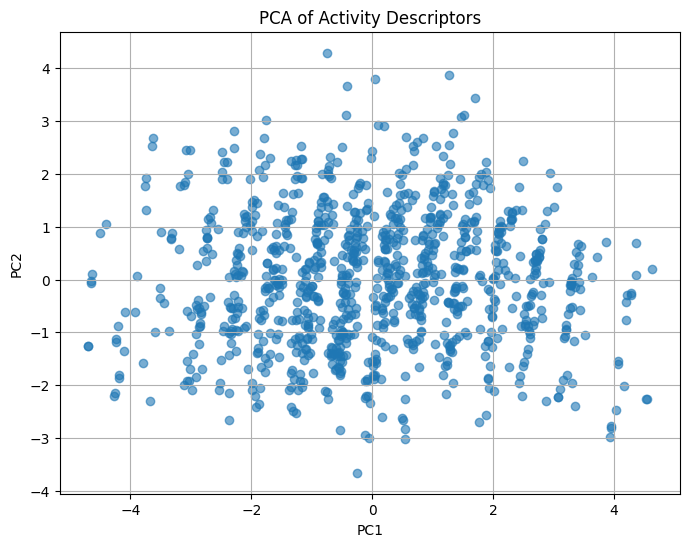

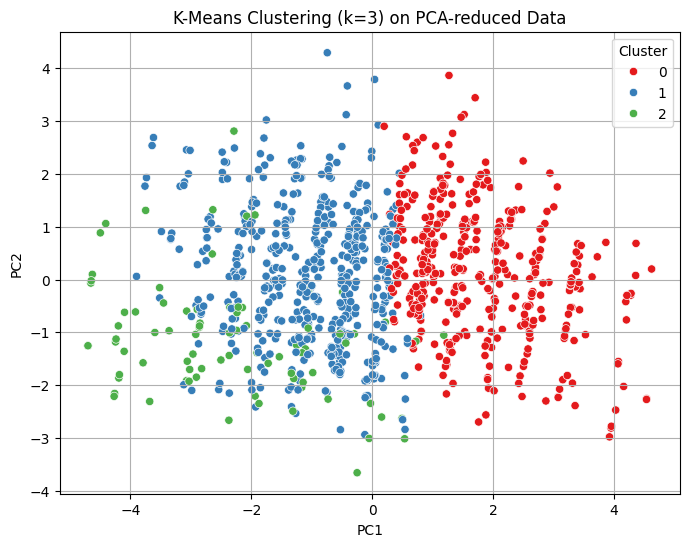

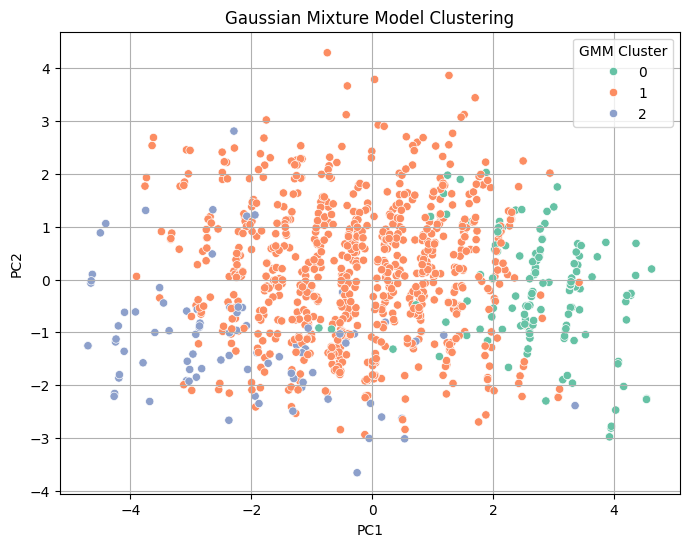

In [ ]:

# Upload the file from your system
from google.colab import files
uploaded = files.upload()

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import io

# Load the uploaded file using the actual name dynamically
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 2: Initial data exploration
print("First 5 rows:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nData info:")
print(df.info())

# Step 3: Drop missing values
df.dropna(inplace=True)

# Step 4: Convert 'yes'/'no' to 1/0 and keep only numeric columns
binary_df = df.applymap(lambda x: 1 if str(x).lower() == "yes" else (0 if str(x).lower() == "no" else x))
binary_df = binary_df.select_dtypes(include=[np.number])

# Step 5: Standardize the data
scaler = StandardScaler()
vacmot_scaled = scaler.fit_transform(binary_df)

# Step 6: Principal Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vacmot_scaled)
print("\nExplained variance ratio by PCA components:", pca.explained_variance_ratio_)

# Step 7: Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title("PCA of Activity Descriptors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Step 8: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(vacmot_scaled)

# Step 9: Plot K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="Set1")
plt.title("K-Means Clustering (k=3) on PCA-reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 10: Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(vacmot_scaled)

# Plot GMM Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=gmm_labels, palette="Set2")
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="GMM Cluster")
plt.grid(True)
plt.show()
